In [43]:
import os
import pickle
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [8]:
stateCodes=pickle.load(open("stateCode.pickle","rb"))
paths=[str(i)+'/' for i in stateCodes]

yearMap=OrderedDict()
yearMapRev=OrderedDict()
count=0
for year in range(1980,2018):
    yearMap[str(year)]=count
    yearMapRev[count]=str(year)
    count+=1
    
carbA=[6,41,53]
carbB=[9,10,23,24,25,34,36,42,44,50,11]

noState = ['"Guam"','"Puerto Rico"','"Hawaii"']
nonCarb = [i for i in stateCodes if i not in carbA+carbB and stateCodes[i] not in noState]

def setplot(plt,ax):
   

    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    return plt,ax


In [3]:

data=OrderedDict()
for path in paths:
    key=path[:-1]
    for year in yearMap:
        extendedPath=path+"Data/o3/"+year
        counties=os.listdir(extendedPath)
        if key not in data:
            data[key]=OrderedDict()
        data[key][year]=len(counties)


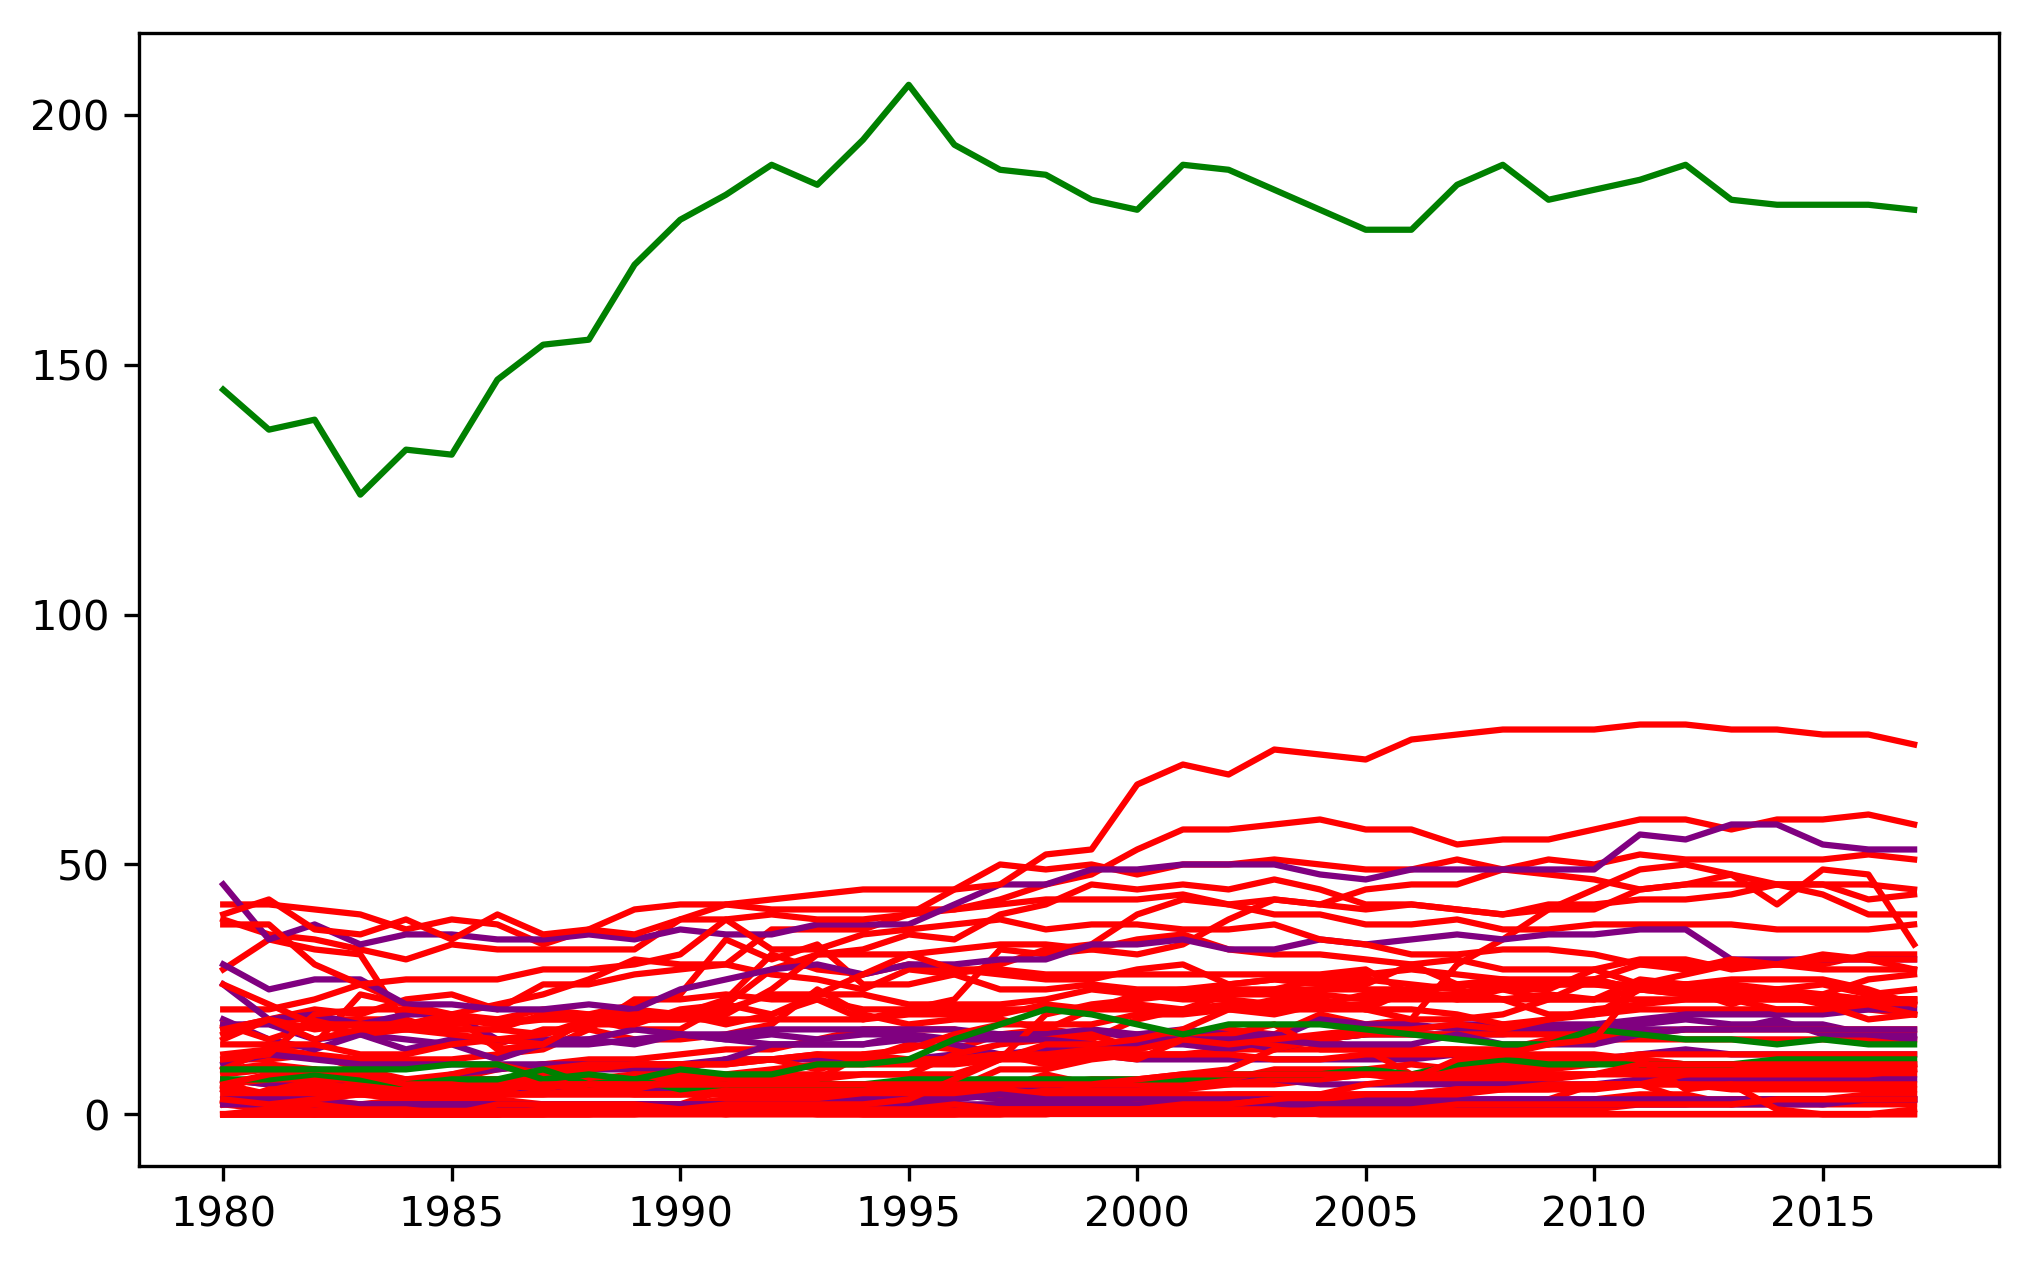

In [4]:
plt.close()
plt.subplots(figsize=(8,5),dpi=300)
for codes in data:
    intCode = int(codes)
    if intCode in carbA:
        plt.plot(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='g')
    elif intCode in carbB:
        plt.plot(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='purple')
    else:
        plt.plot(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='r')

plt.xticks(list(range(len(data[codes])))[::5],[i for i in data[codes]][::5])
#plt.legend(loc='upper right') 
plt.show()

A LinregressResult(slope=1.6121019805230334, intercept=166.14979757085021, rvalue=0.75649770099690139, pvalue=3.9309719495492687e-08, stderr=0.23227847947010846)
B LinregressResult(slope=1.5530145530145529, intercept=132.34817813765181, rvalue=0.89124493972233643, pvalue=6.3887126087748614e-14, stderr=0.13171214552236926)
O LinregressResult(slope=15.743516796148377, intercept=401.11336032388658, rvalue=0.968272150838277, pvalue=2.8410685665398996e-23, stderr=0.67719844215718183)


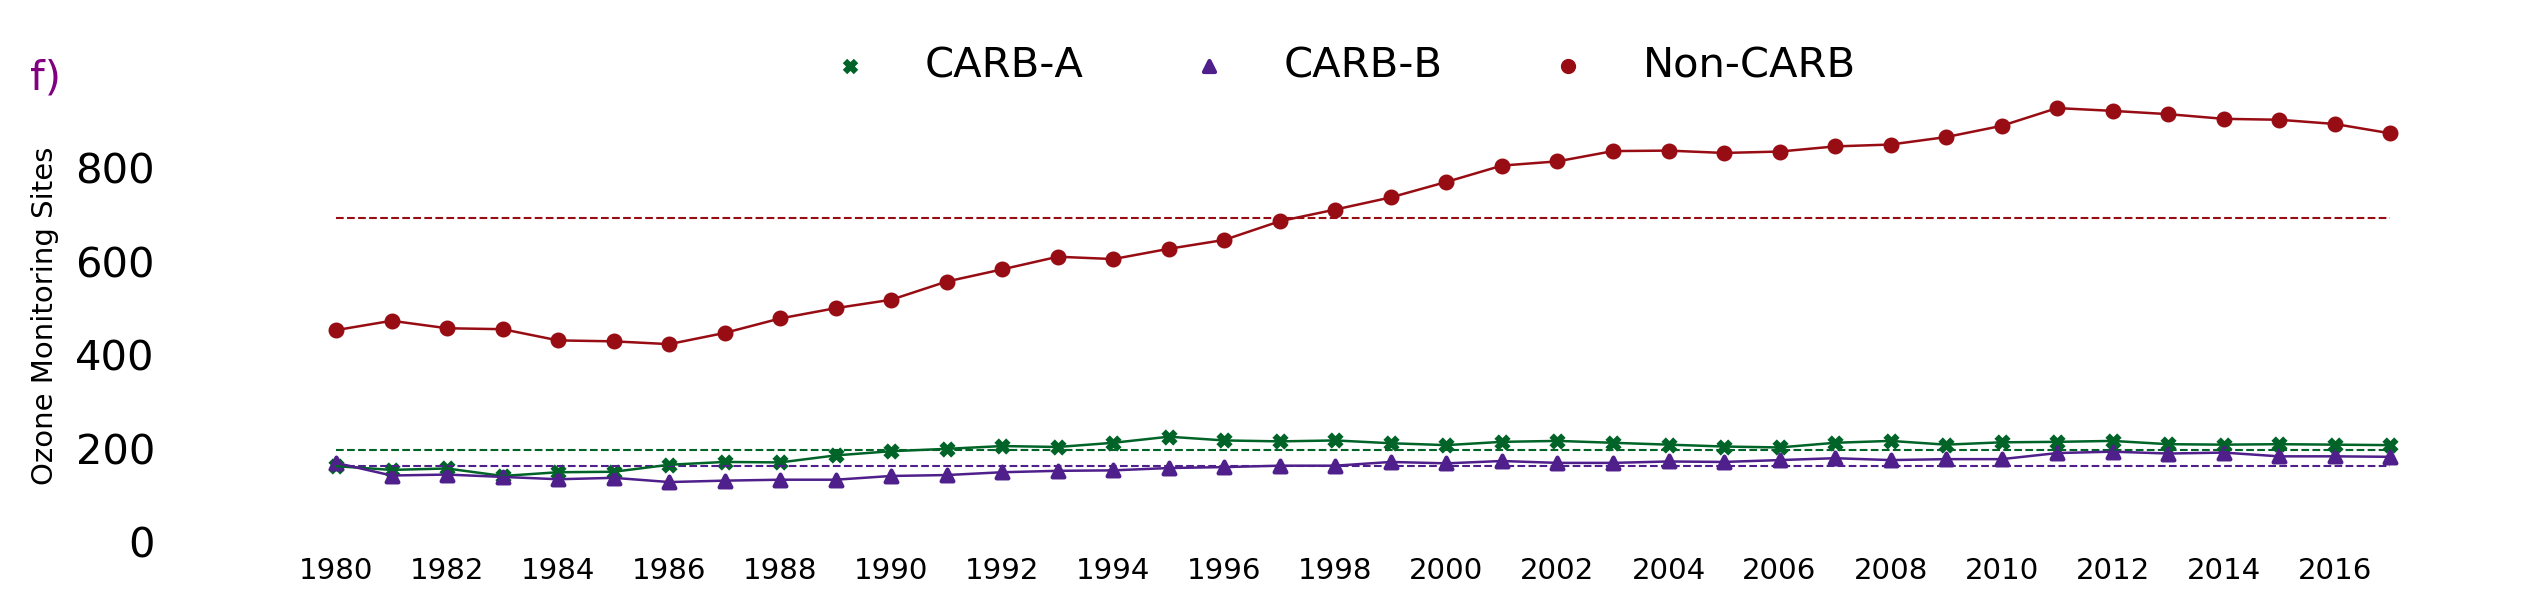

In [45]:
regionData=OrderedDict()
for codes in data:
    for year in data[codes]:
        if year not in regionData:
            regionData[year]={'A':0,'B':0,'O':0}
        intCode = int(codes)
        if intCode in carbA:
            regionData[year]['A']+=data[codes][year]
        elif intCode in carbB:
            regionData[year]['B']+=data[codes][year]
        elif intCode in nonCarb:
            regionData[year]['O']+=data[codes][year]
            
marker= ['x','^','o']
c1,c2,c3=plt.get_cmap('Greens'),plt.get_cmap('Purples'),plt.get_cmap('Reds')
color=[c1(0.9),c2(0.9),c3(0.9)]
            
plt.close()
fig,ax = plt.subplots(figsize=(10,2),dpi=300)   
plt,ax = setplot(plt,ax)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.text(-0.06, 1, 'f)', transform=ax.transAxes, size=10,color='purple')

# for year,index in zip(regionData,range(0,4*len(regionData),4)):
#     #print(year,index,regionData[year]['A'])
#     plt.bar(index-1,regionData[year]['A'],color='g')
#     plt.bar(index,regionData[year]['B'],color='purple')
#     plt.bar(index+1,regionData[year]['O'],color='r')

x = [i for i in regionData]
for label,index in zip(['A','B','O'],range(3)):
    xx = list(range(len(x)))
    yy = [regionData[i][label] for i in regionData]
    print(label,stats.linregress(xx,yy))

    plt.hlines(np.mean(yy),0,37,linestyle="--",linewidth=0.5,color=color[index])
    plt.scatter(list(range(len(x))),yy,marker=marker[index],color=color[index],s=8)
    plt.plot(list(range(len(x))),yy,color=color[index],linewidth=0.6)


plt.xlim(-3,None)
plt.ylim(0,None)
plt.scatter(-5,-5,color=color[0],label='CARB-A',marker=marker[0],s=7)
plt.scatter(-5,-5,color=color[1],label='CARB-B',marker=marker[1],s=7)
plt.scatter(-5,-5,color=color[2],label='Non-CARB',marker=marker[2],s=7)
plt.legend(loc='center',bbox_to_anchor=(0.5, 1.05),ncol=3,frameon=False)
#plt.xticks(list(range(0,4*len(regionData),4))[::3],[i for i in data[codes]][::3])
plt.ylabel("Ozone Monitoring Sites",size=7)
plt.xticks(list(range(len(regionData)))[::2],[i for i in data[codes]][::2],size=7)
#plt.title("Ozone Monitoring Sites".format(stateCodes[int(codes)].replace('"','')))
plt.savefig("Com/images/Figure7f.png",bbox_inches="tight")
plt.show()

In [16]:
regionData['1980']['A']

161

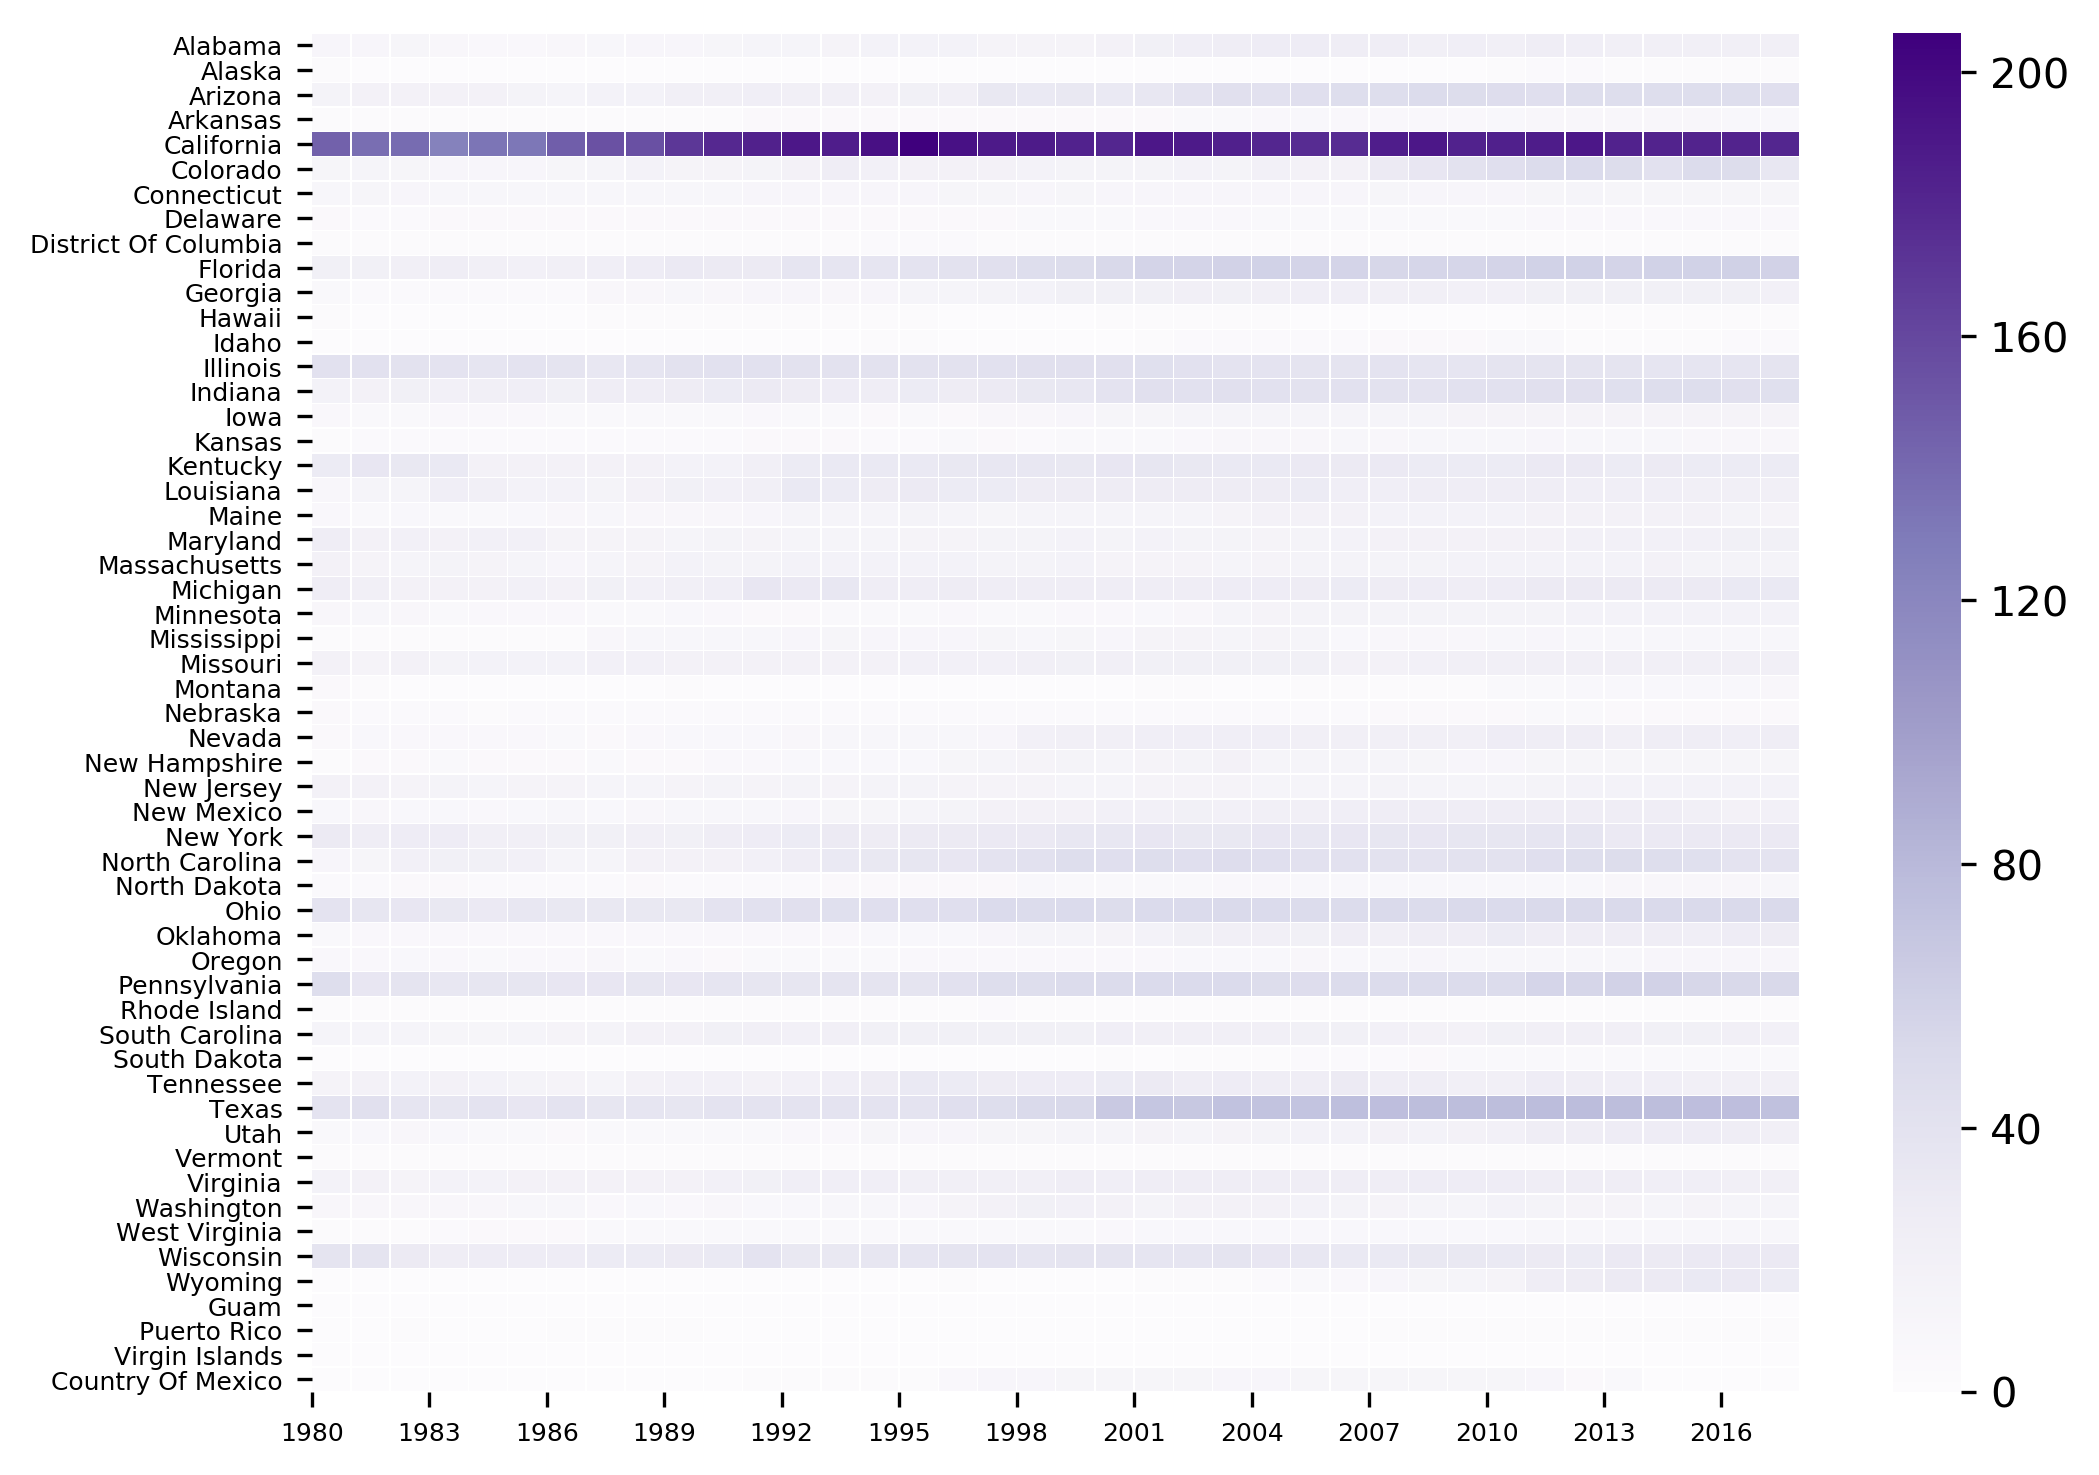

In [13]:
ndata=[]
for codes in data:
    ndata.append([data[codes][i] if data[codes][i]!=None else np.nan for i in data[codes]])
    
plt.close()
plt.subplots(figsize=(8,6),dpi=300) 

sns.heatmap(ndata,linewidth=0.1,cmap=plt.get_cmap('Purples'))
plt.yticks([i+0.5 for i in range(len(data))],[stateCodes[int(i)].replace('"','') for i in data],size=6)
plt.xticks(list(range(len(yearMap)))[::3],list(yearMap)[::3],size=6)
plt.show()

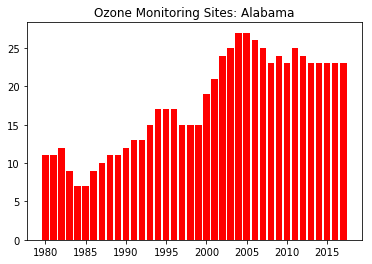

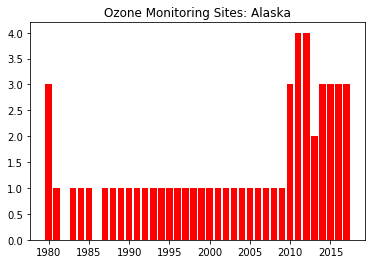

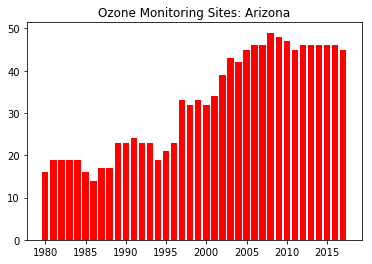

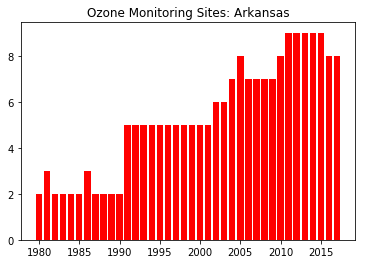

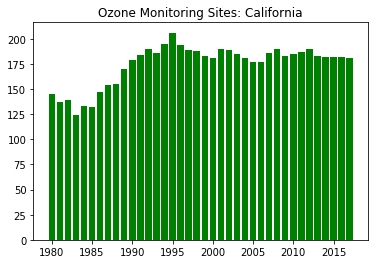

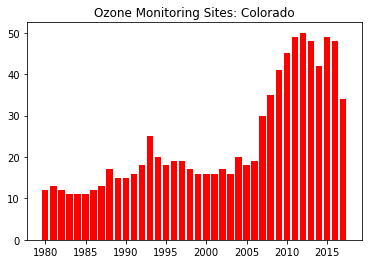

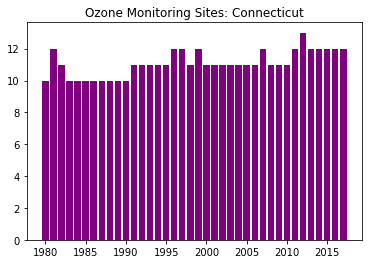

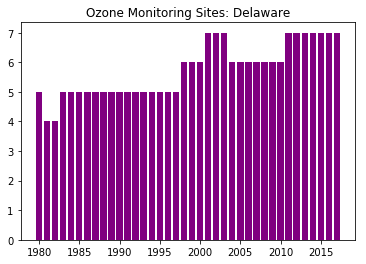

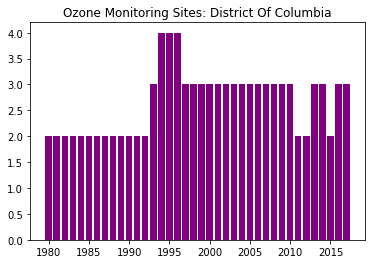

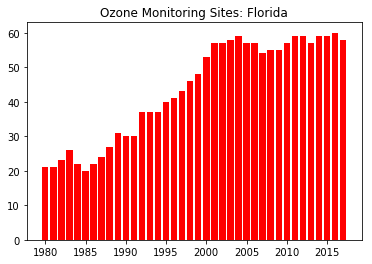

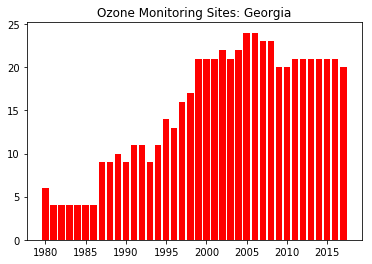

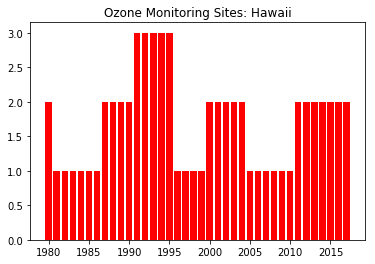

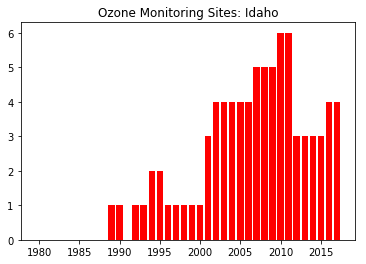

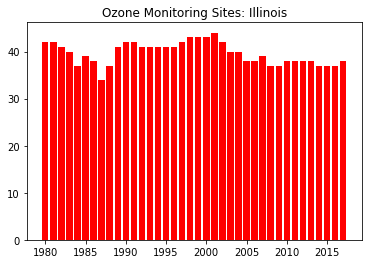

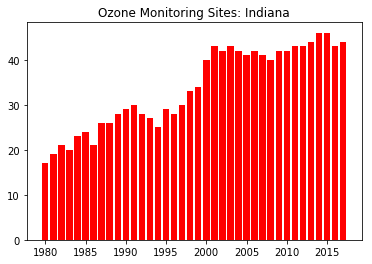

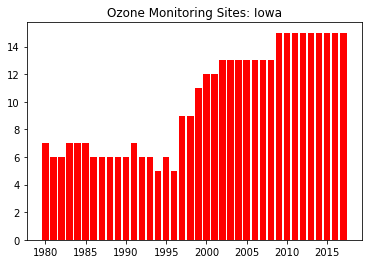

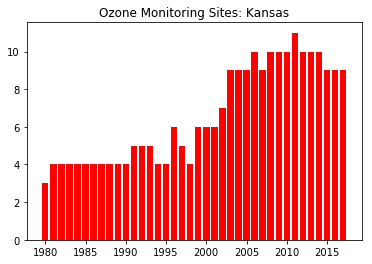

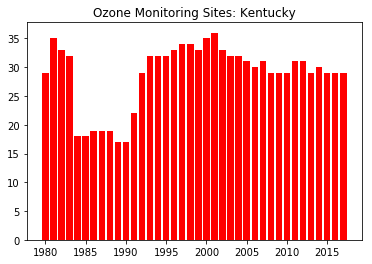

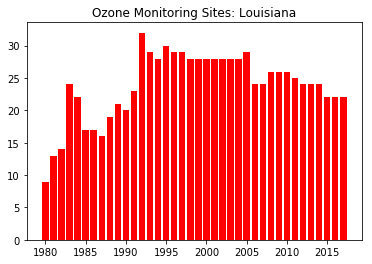

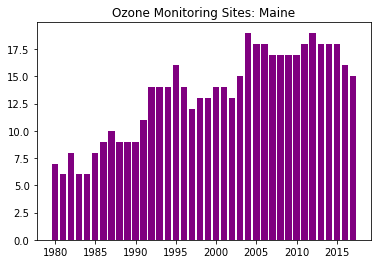

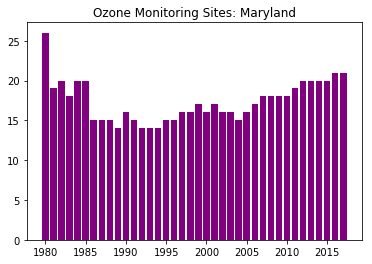

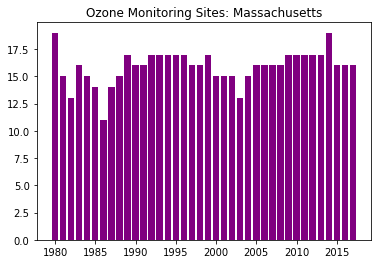

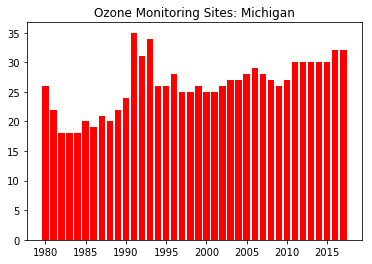

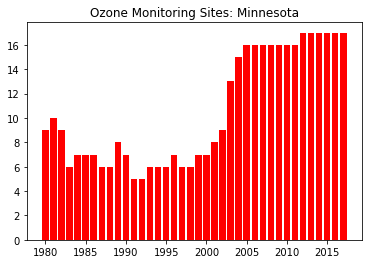

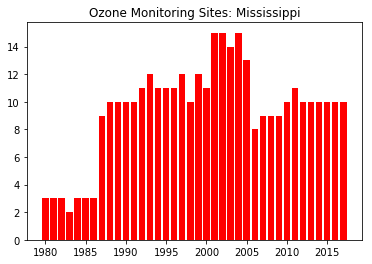

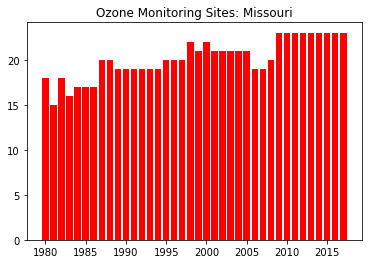

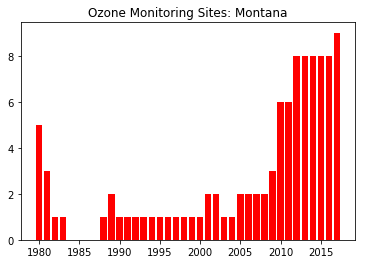

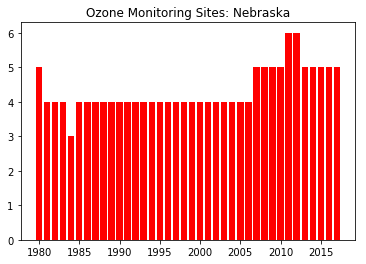

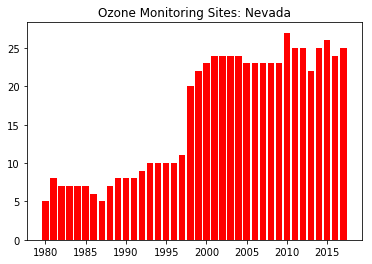

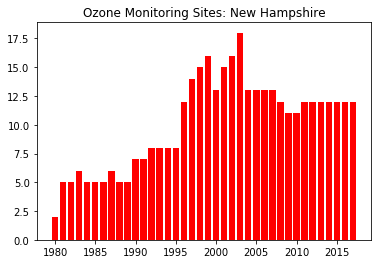

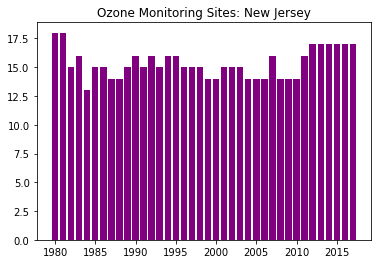

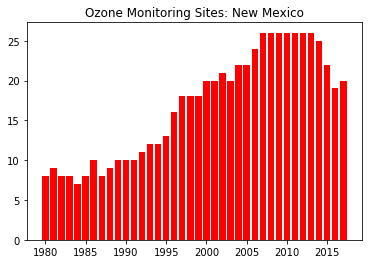

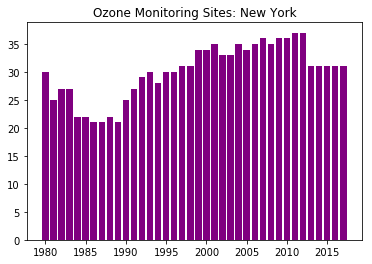

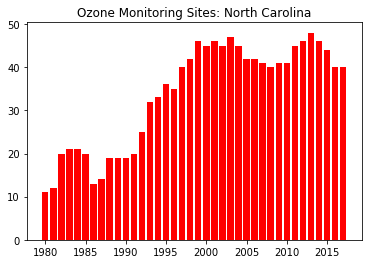

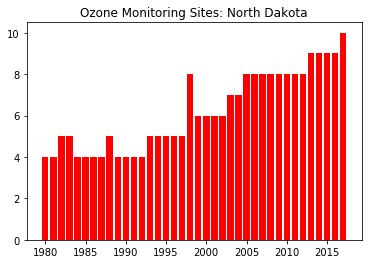

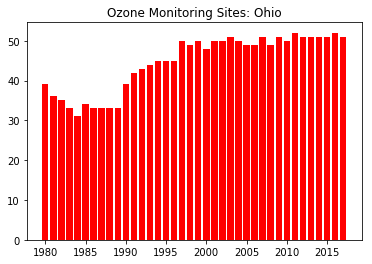

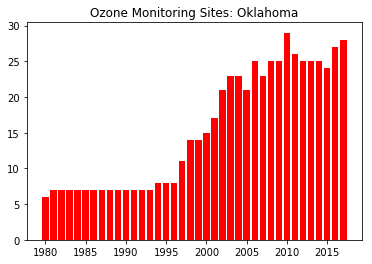

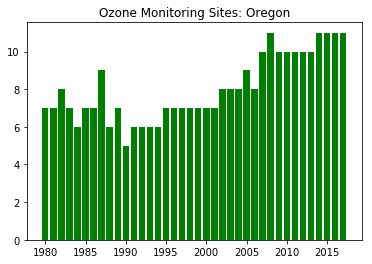

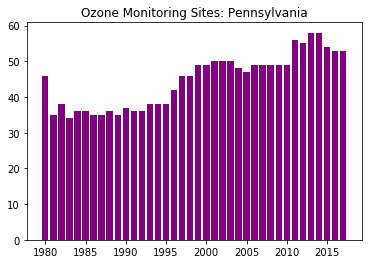

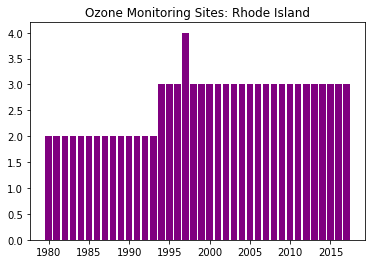

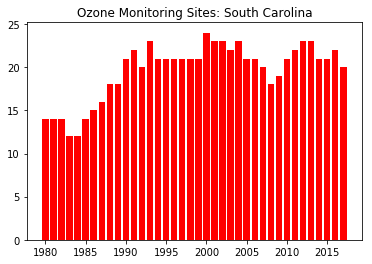

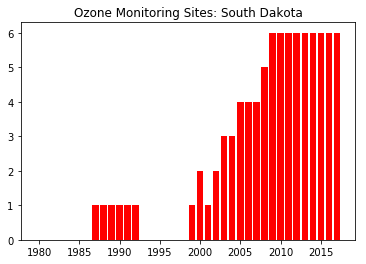

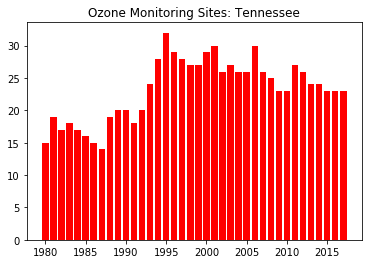

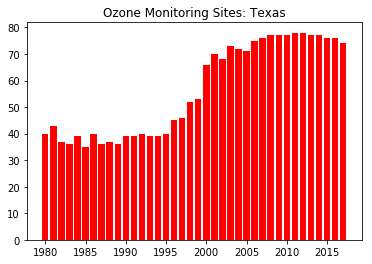

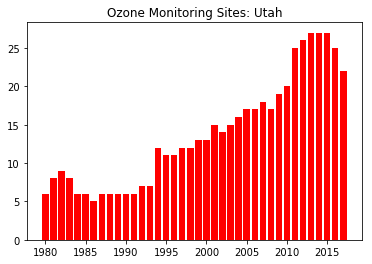

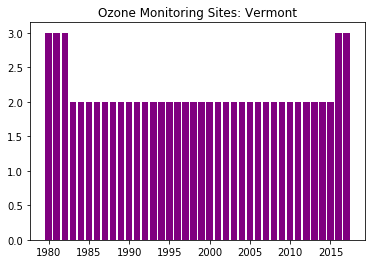

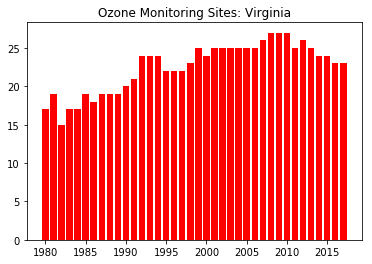

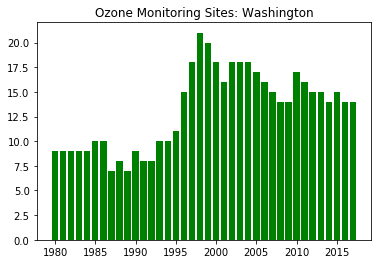

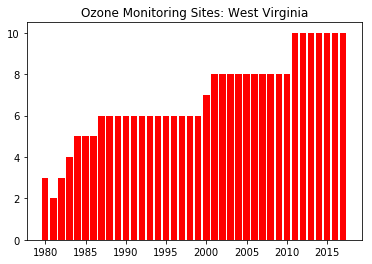

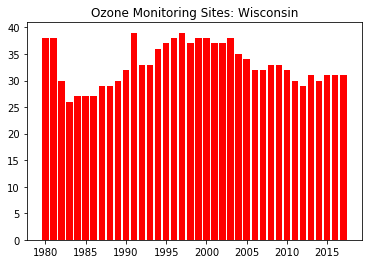

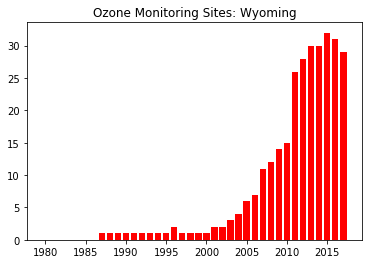

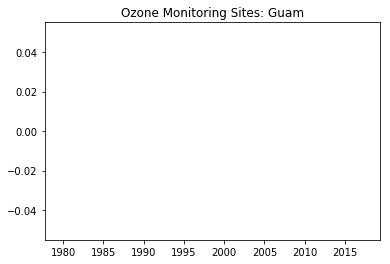

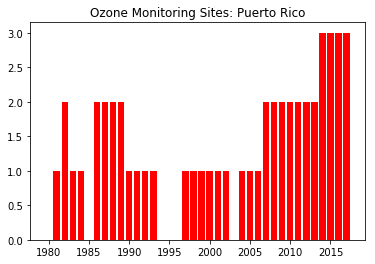

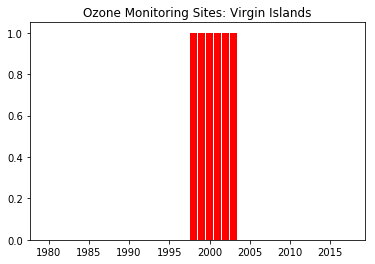

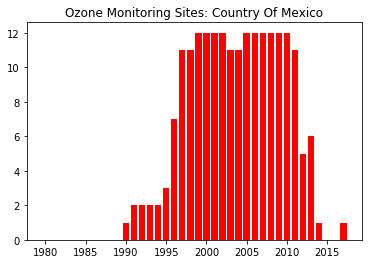

In [41]:

for codes in data:
    plt.close()
    #plt.subplots(figsize=(2,1),dpi=300)
    intCode = int(codes)
    if intCode in carbA:
        plt.bar(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='g')
    elif intCode in carbB:
        plt.bar(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='purple')
    else:
        plt.bar(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='r')

    plt.xticks(list(range(len(data[codes])))[::5],[i for i in data[codes]][::5])
    plt.title("Ozone Monitoring Sites: {}".format(stateCodes[int(codes)].replace('"','')))
    plt.show()
    

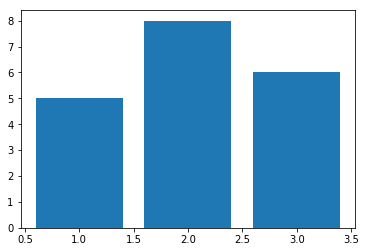

In [34]:
plt.show()

In [7]:
pickle.dump(regionData,open("monitoringSitesRegion.pickle",'wb'))

In [6]:
regionData

OrderedDict([('1980', {'A': 161, 'B': 168, 'O': 452}),
             ('1981', {'A': 153, 'B': 141, 'O': 472}),
             ('1982', {'A': 156, 'B': 143, 'O': 456}),
             ('1983', {'A': 140, 'B': 138, 'O': 454}),
             ('1984', {'A': 148, 'B': 133, 'O': 430}),
             ('1985', {'A': 149, 'B': 136, 'O': 428}),
             ('1986', {'A': 164, 'B': 127, 'O': 422}),
             ('1987', {'A': 170, 'B': 130, 'O': 446}),
             ('1988', {'A': 169, 'B': 132, 'O': 477}),
             ('1989', {'A': 184, 'B': 132, 'O': 499}),
             ('1990', {'A': 193, 'B': 140, 'O': 517}),
             ('1991', {'A': 198, 'B': 142, 'O': 556}),
             ('1992', {'A': 204, 'B': 148, 'O': 582}),
             ('1993', {'A': 202, 'B': 151, 'O': 609}),
             ('1994', {'A': 211, 'B': 152, 'O': 604}),
             ('1995', {'A': 224, 'B': 157, 'O': 626}),
             ('1996', {'A': 216, 'B': 159, 'O': 645}),
             ('1997', {'A': 214, 'B': 162, 'O': 685}),
          

In [9]:
plt.subplots?